<a href="https://colab.research.google.com/github/hagijakobson/customer-segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation for Marketing Strategy with Unsupervised Learning

## Table of Contents
[1. Introduction](#introduction)

[2. Import Libraries](#libraries)

[3. Load Dataset](#dataset)

[4. Data Cleaning](#data-cleaning) <br>
4.1 Identify and delete columns (features) that contain single value <br>
4.2 Identify and delete rows (records) that contain duplicate data <br>
4.3 Identify and delete columns (features) taht have a low variance

[5. Exploratory Data Analysis](#eda) <br>
5.1 Statistics summary <br>
5.2 Feature distributions <br>
5.3 Feature correlations

[6. Clustering](#clustering) <br>
6.1 Setting the number of clusters using the Elbow Method <br>
6.2 K-means <br>
6.3 Cluter feature distributions <br>
6.4 Cluster features average

[7. Dimensionality Reduction and Visualization t-distributed Stochastic Neighbourhood Embedding (t-SNE)](#visualization)

[8. Insights](#insights)

[9. Save results](#save-results)

[References](#references)

## <a name="introduction"></a> 1\. Introduction

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset:
* **CUSTID**: Identification of Credit Card holder (Categorical)
* **BALANCE**: Balance amount left in their account to make purchases
* **BALANCEFREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES**: Amount of purchases made from account
* **ONEOFFPURCHASES**: Maximum purchase amount done in one-go
* **INSTALLMENTSPURCHASES**: Amount of purchase done in installment
* **CASHADVANCE**: Cash in advance given by the user
* **PURCHASESFREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY**: How frequently the cash in advance being paid
* **CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced"
* **PURCHASESTRX**: Numbe of purchase transactions made
* **CREDITLIMIT**: Limit of Credit Card for user
* **PAYMENTS**: Amount of Payment done by user
* **MINIMUM_PAYMENTS**: Minimum amount of payments made by user
* **PRCFULLPAYMENT**: Percent of full payment paid by user
* **TENURE**: Tenure of credit card service for user
 

## <a name="libraries"></a> 2\. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## <a name="dataset"></a> 3\. Load Dataset

In [ ]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv', index_col='CUST_ID')

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

## <a name="data-cleaning"></a> 4\. Data Cleaning

### 4.1 Identify and Delete Columns (Features) That Contain a Single Value

In [ ]:
creditcard_df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

All columns have more than one value.

### 4.2 Identify and Delete Rows (Records) that Contain Duplicate Data

In [ ]:
# calculate duplicates
dups = creditcard_df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(creditcard_df[dups])

False
Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


There are no duplicate records in the dataset.

### 4.3 Identify and Remove Columns (Features) That Have A Low Variance

For this dataset I will not apply this step.

### 4.4 Dealing with missing values

In [ ]:
creditcard_df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## <a name="eda"></a> 5\. Exploratory Data Analysis

### 5.1 Statistics summary

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 5.2 Feature distributions

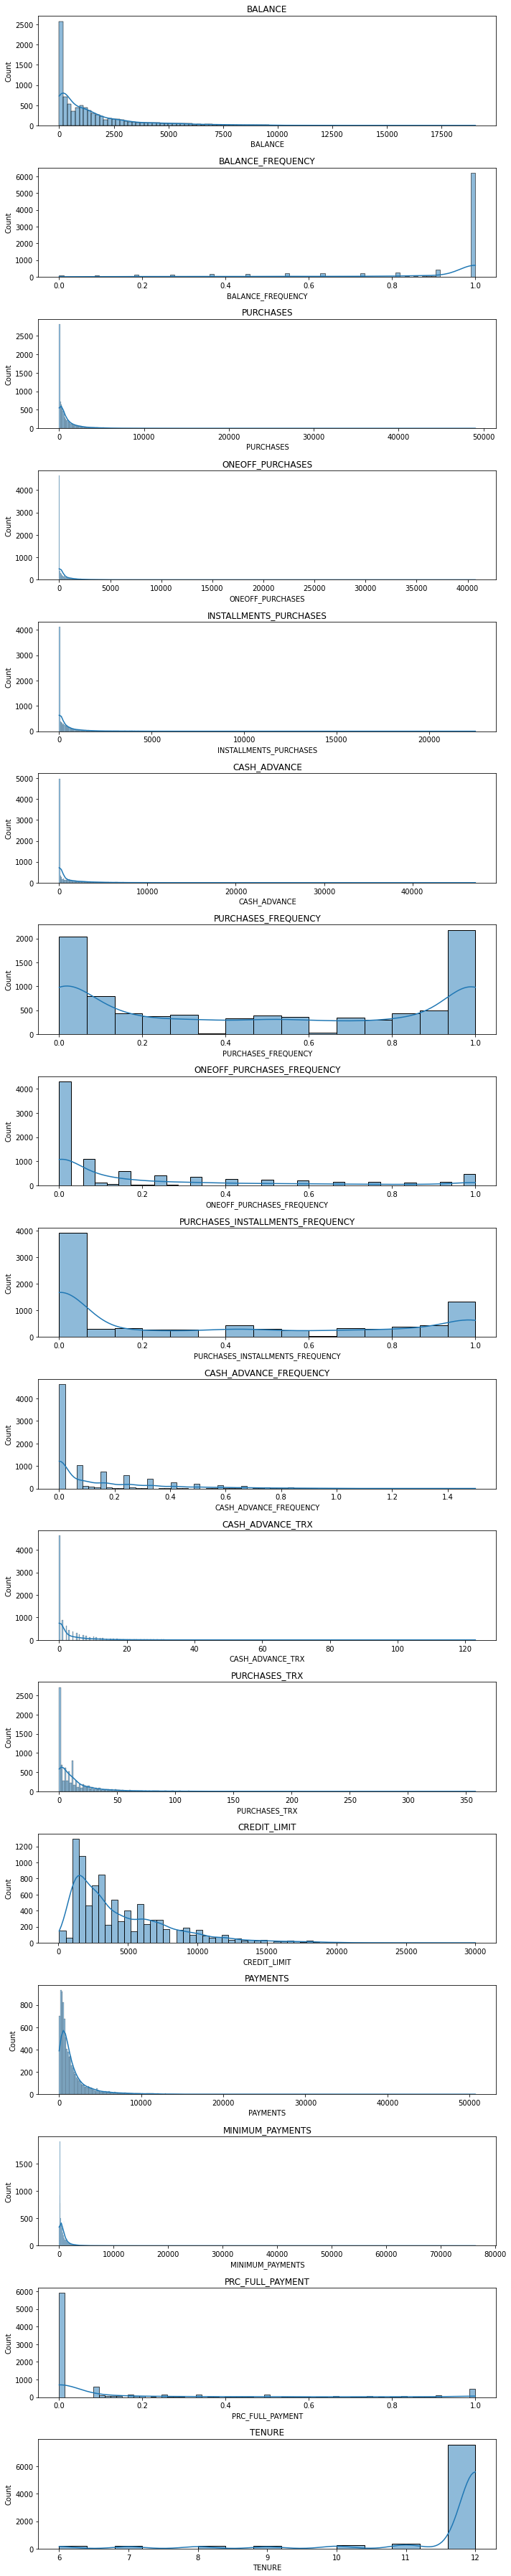

In [ ]:
fig, axes = plt.subplots(17, 1,figsize=(10,50))
i = 0
for column in creditcard_df.columns:
    sns.histplot(data=creditcard_df, x=column, kde = True, ax=axes[i])
    axes[i].title.set_text(column)
    i+=1
plt.tight_layout();

### 5.3 Feature correlations

In [ ]:
correlations = creditcard_df.corr()

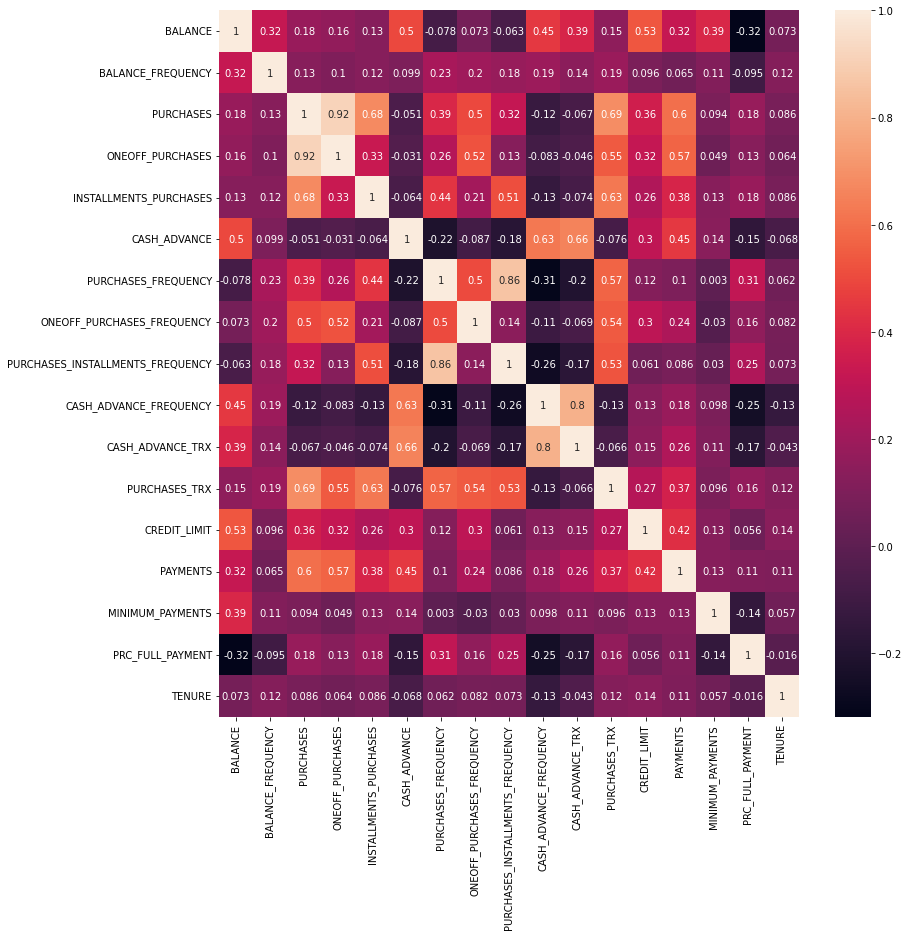

In [ ]:
f, ax = plt.subplots(figsize=(13,13))
sns.heatmap(correlations, annot=True);

## <a name="clustering"></a> 6\. Clustering

### 6.1 Setting the number of clusters using the Elbow Method

In [ ]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)

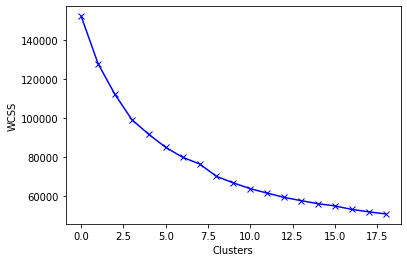

In [ ]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

### 6.2 K-means

In [ ]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
 array([  54,  621,  434,   30,  858, 1085, 1177, 2691, 2000]))

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407
1,865.053452,0.795079,381.805926,230.358696,151.930322,1123.871809,0.408609,0.115637,0.275639,0.197228,3.260870,5.056361,2426.754347,596.489461,376.965548,0.158067,7.227053
2,3347.726316,0.987993,5833.519194,3552.815346,2282.086336,569.441255,0.957229,0.689310,0.846685,0.073904,1.801843,82.728111,9040.668203,5431.991336,1476.556232,0.247216,11.963134
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,5056.453037,0.969928,540.181704,337.388040,202.912299,5245.854855,0.301012,0.140990,0.201578,0.523288,16.564761,8.193699,8251.813939,4143.352185,1745.374071,0.039749,11.607935
5,1215.335922,0.968693,1926.747392,1546.754535,379.992857,266.226473,0.862906,0.759207,0.389408,0.051756,1.004608,27.289401,5807.905320,1931.214066,484.392555,0.271944,11.861751
6,104.735340,0.368592,335.339312,197.642005,137.949473,304.596210,0.266475,0.068715,0.190161,0.030997,0.683942,4.267630,3843.448976,1145.302906,266.389537,0.234927,11.784197
7,1590.452464,0.972802,228.708009,180.751757,48.140085,789.634225,0.142144,0.079566,0.063321,0.157657,3.087667,2.588410,3375.099059,1008.028263,725.770582,0.020101,11.882987
8,789.458991,0.956042,928.693265,189.831295,739.308610,221.182476,0.888614,0.088112,0.844102,0.040615,0.798000,19.351000,3561.335101,1122.829704,611.682108,0.248058,11.861000


In [ ]:
creditcard_df_cluster = pd.concat([creditcard_df, 
                                   pd.DataFrame(data={'cluster': labels}, 
                                                index=creditcard_df.index)], 
                                  axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


### 6.3 Cluster feature distributions

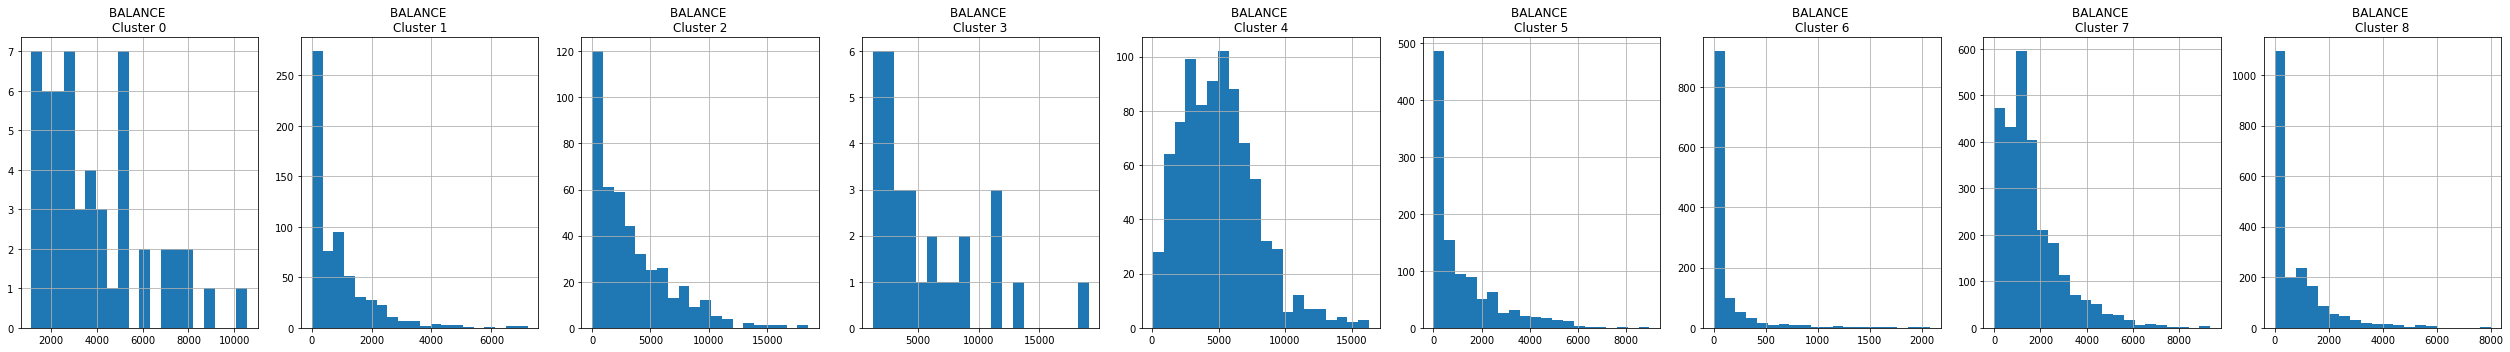

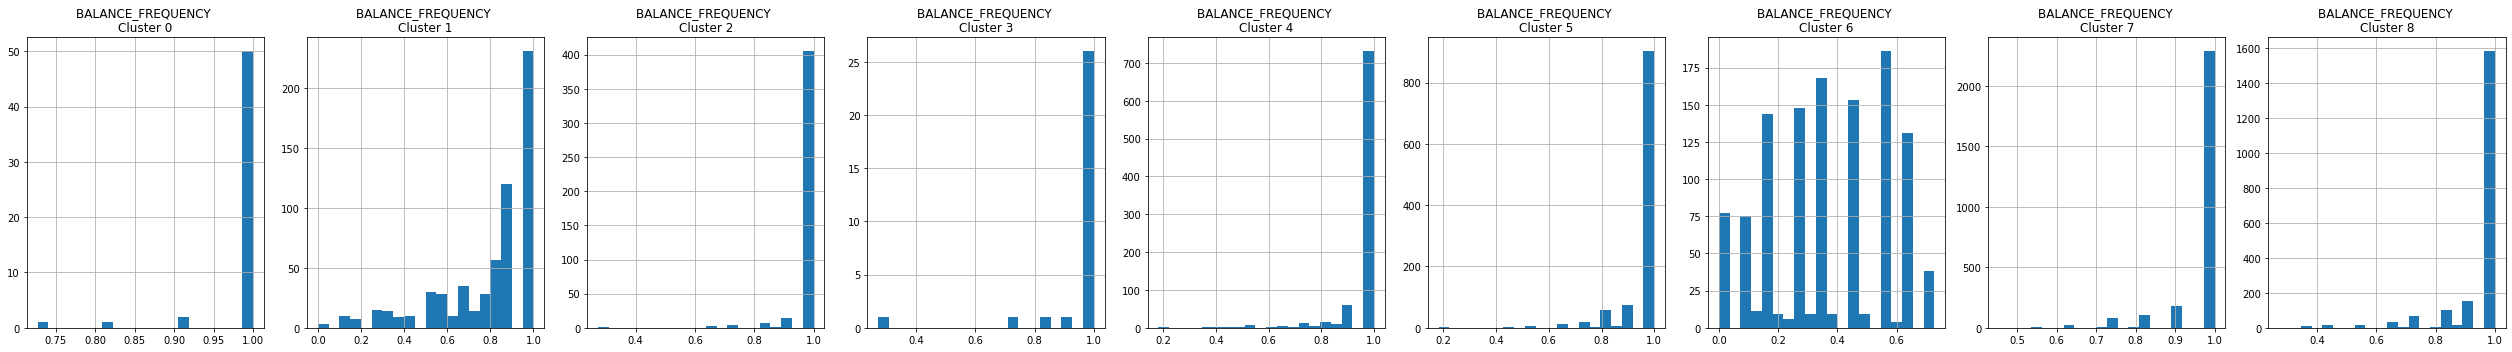

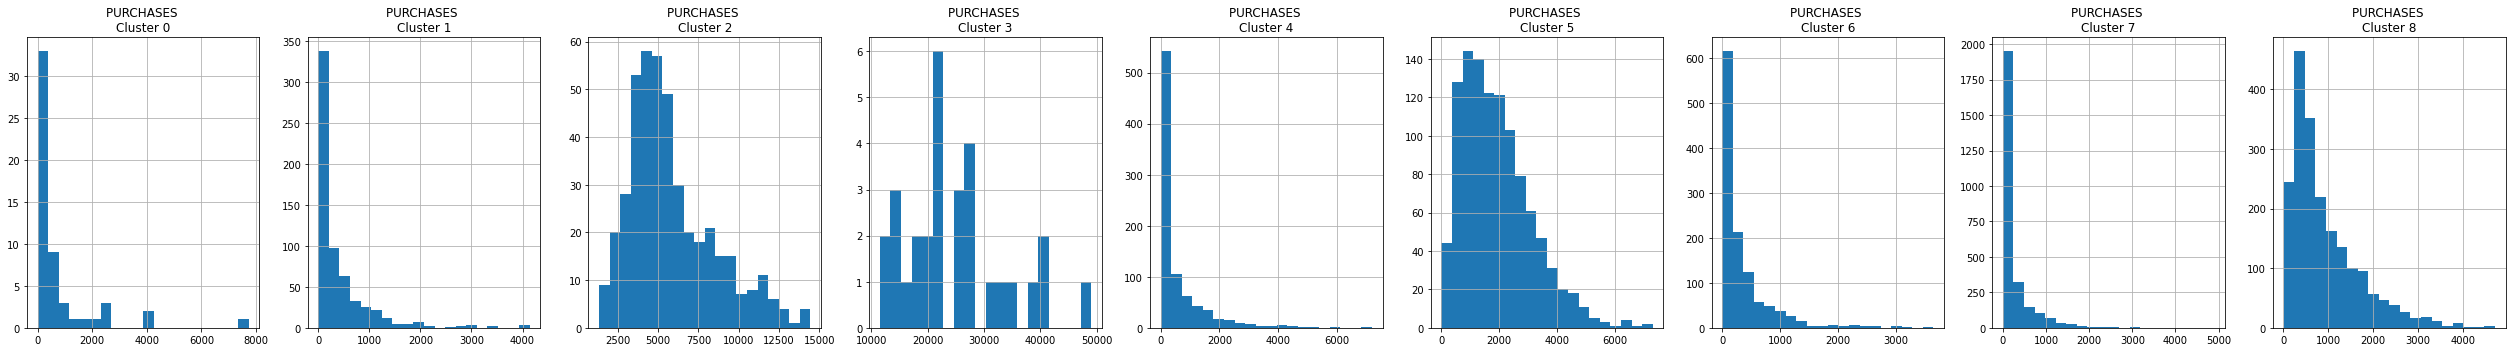

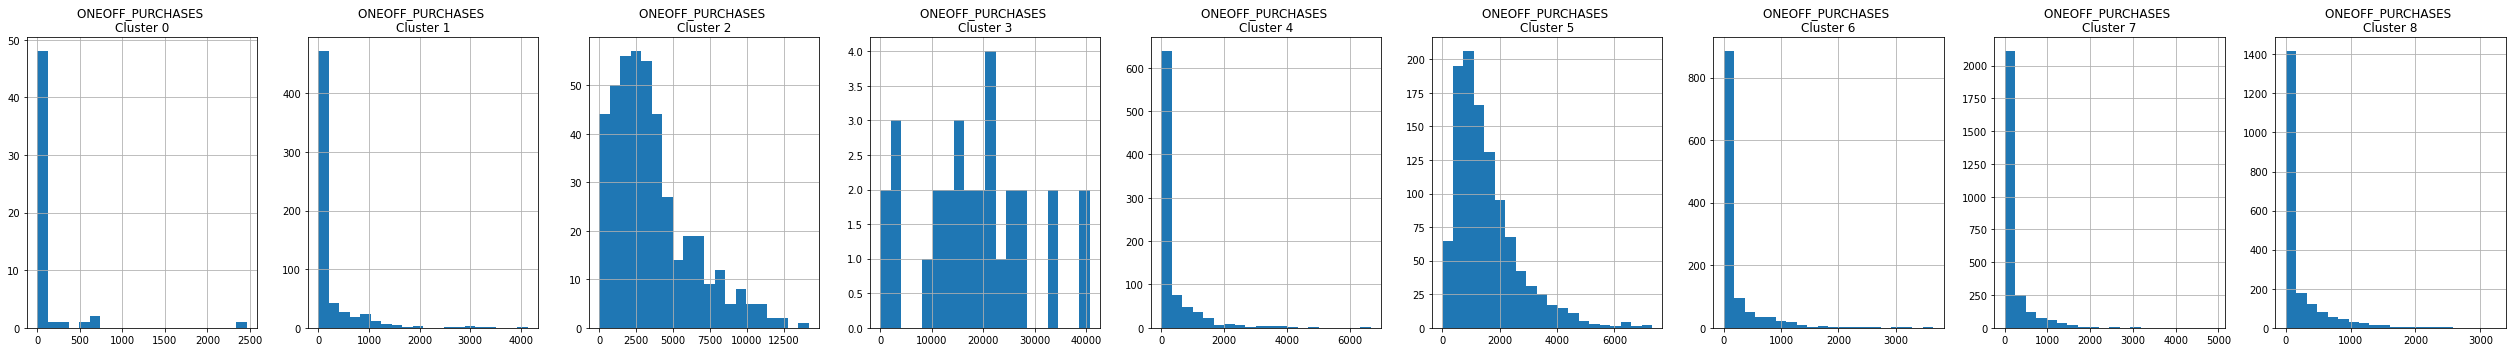

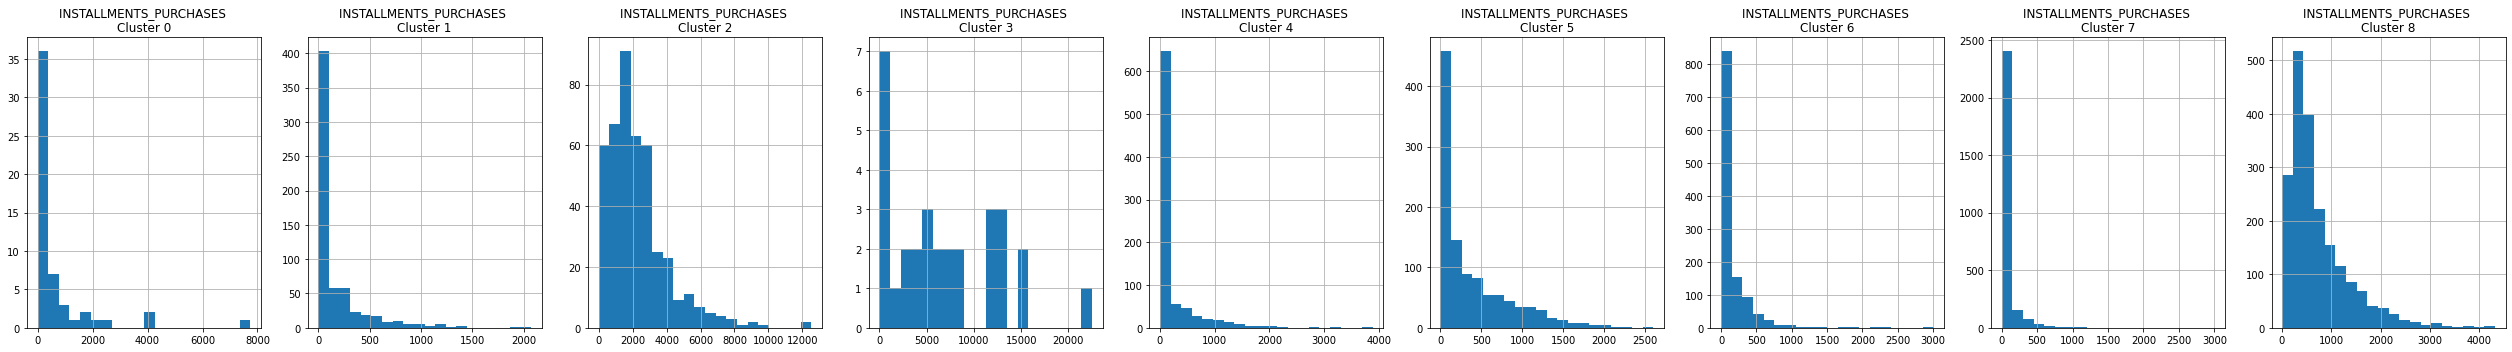

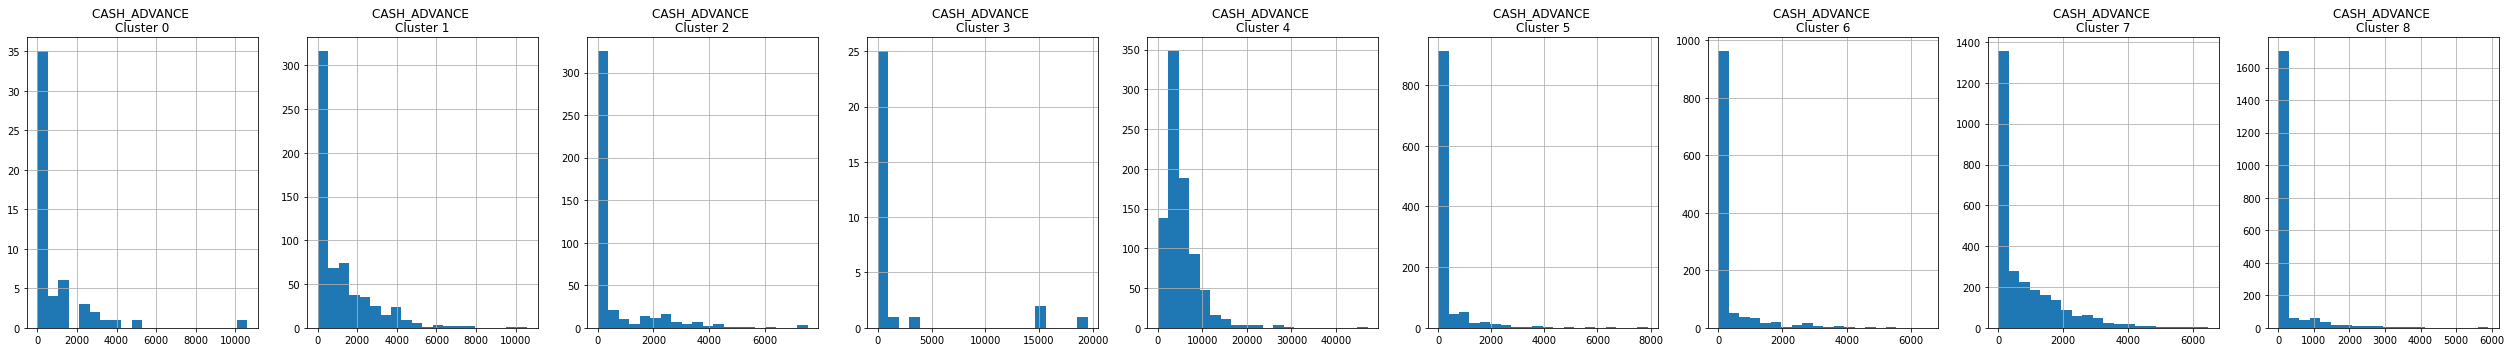

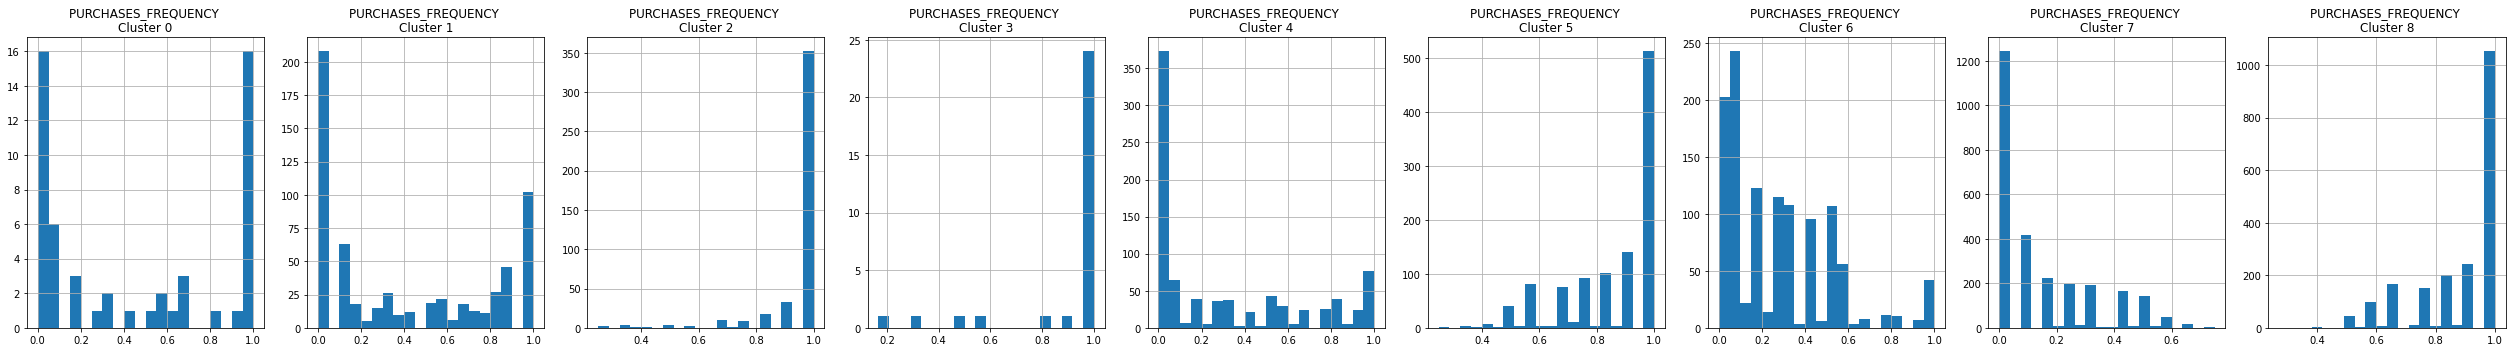

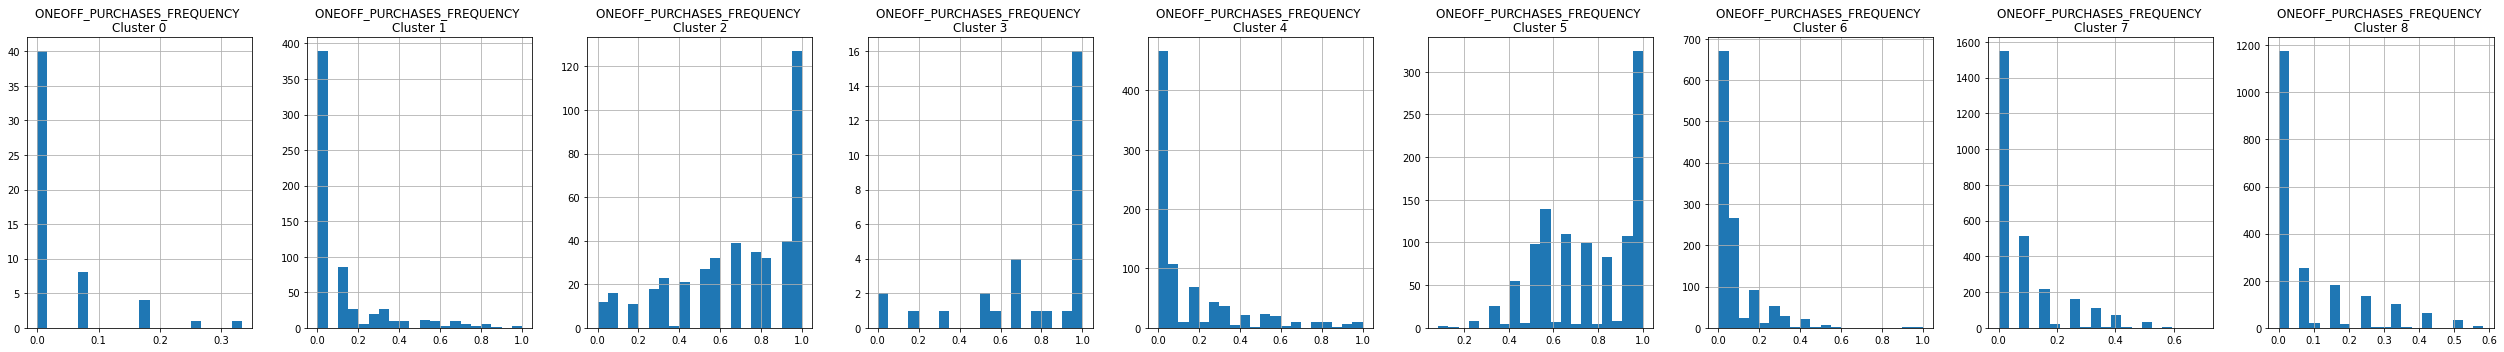

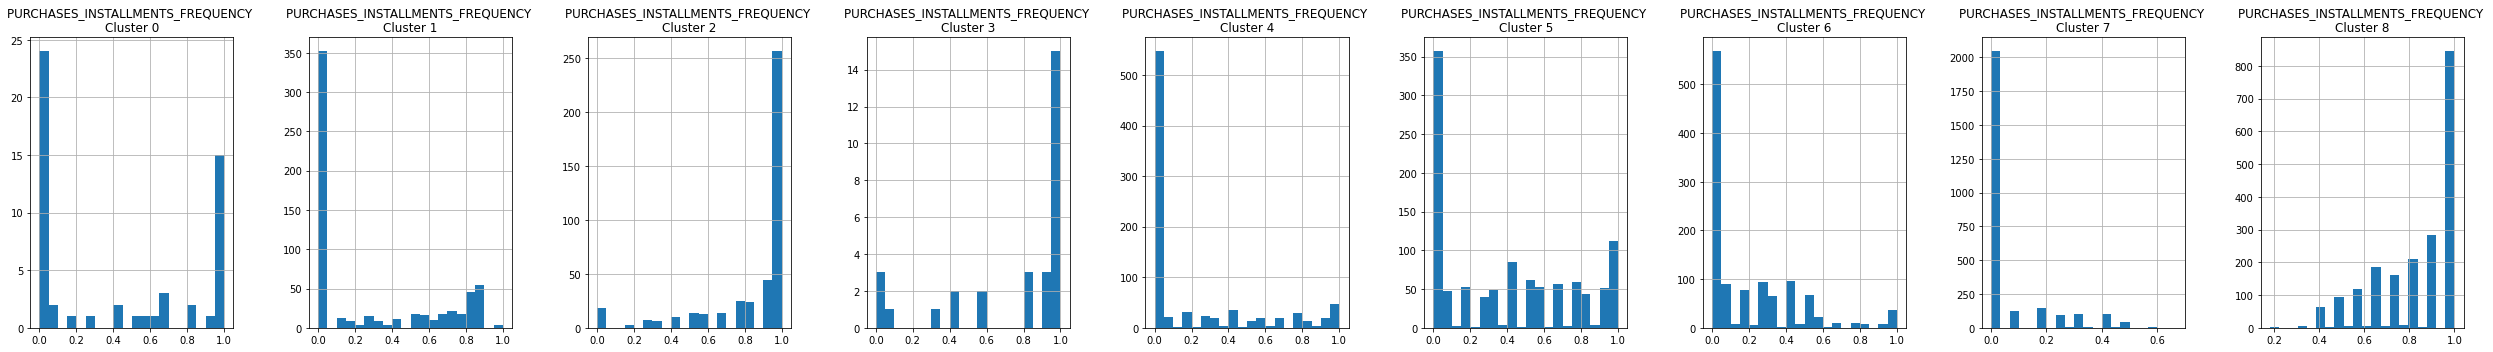

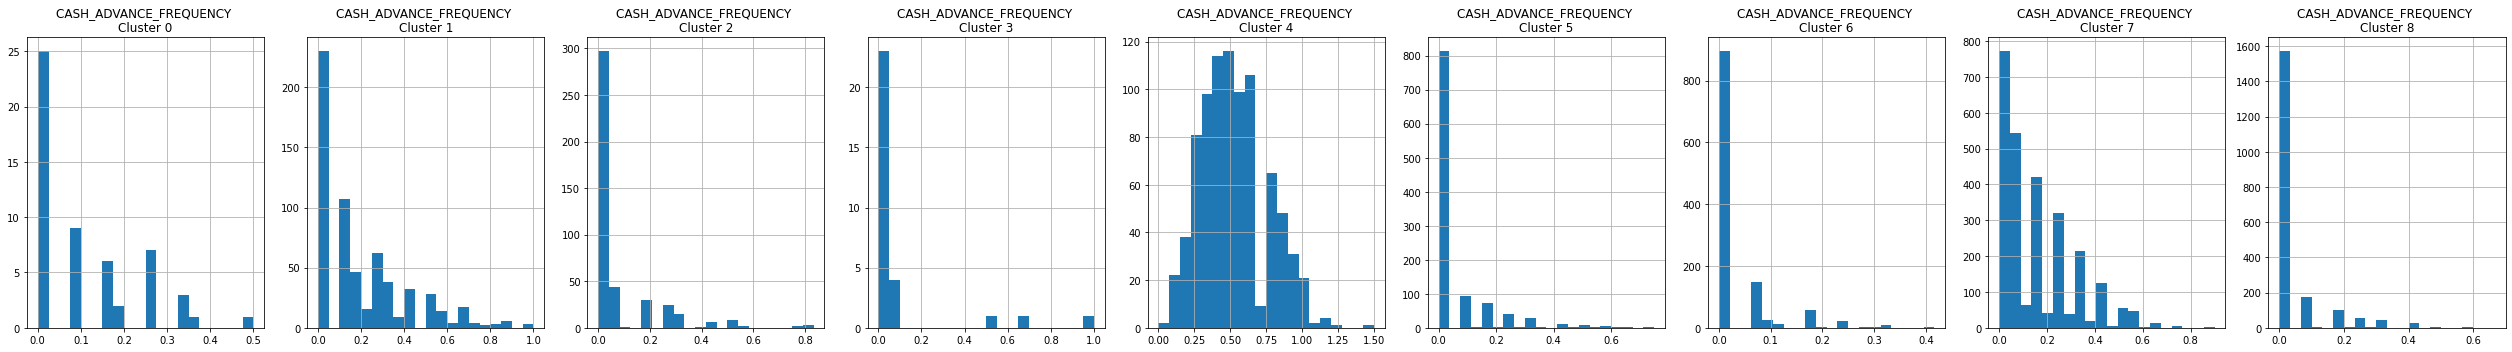

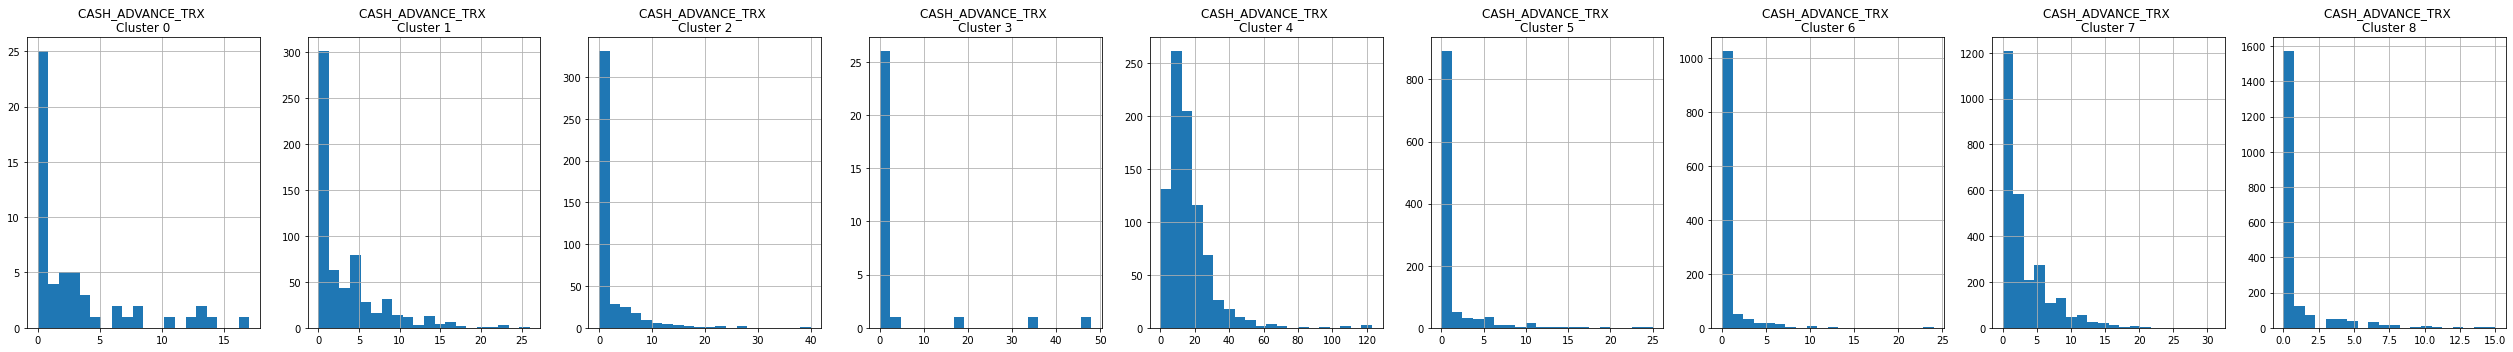

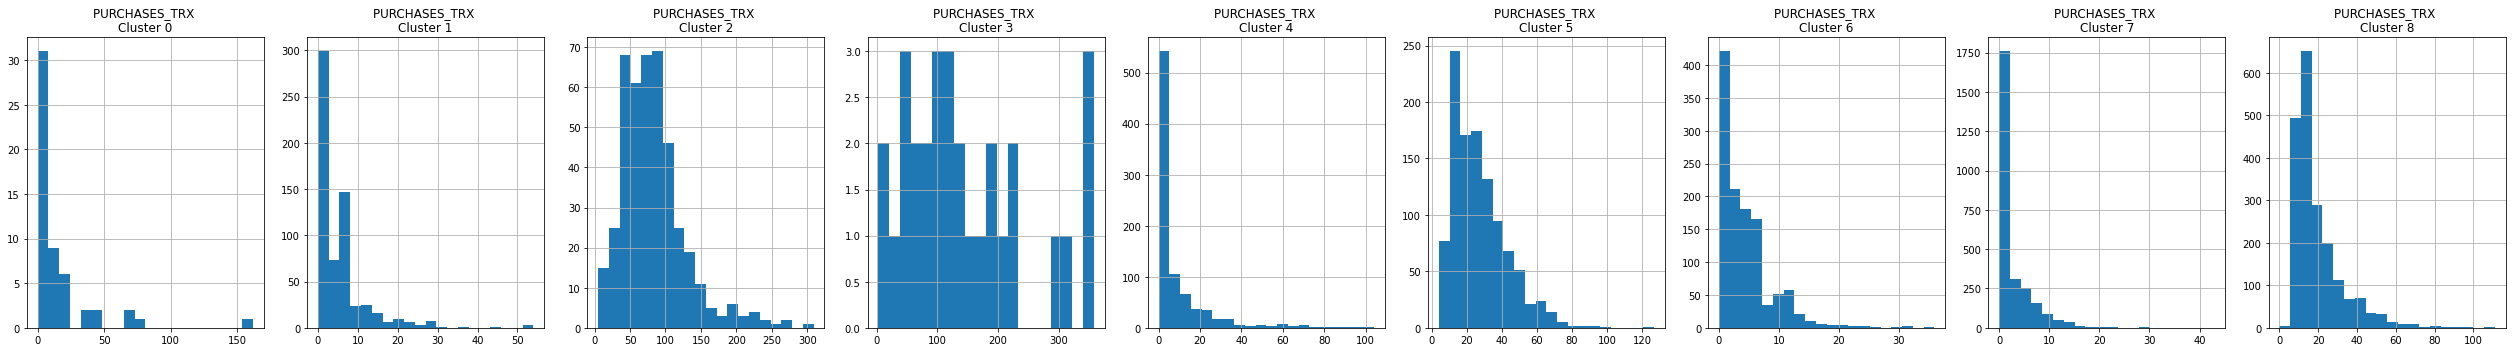

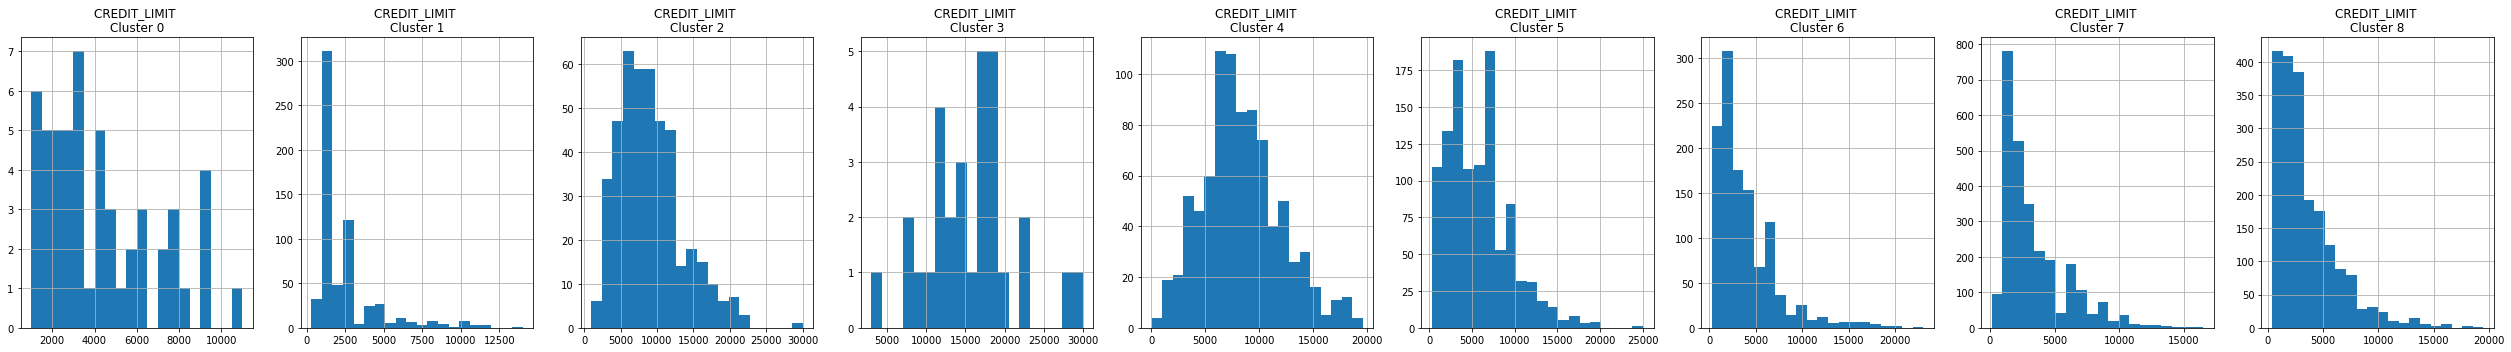

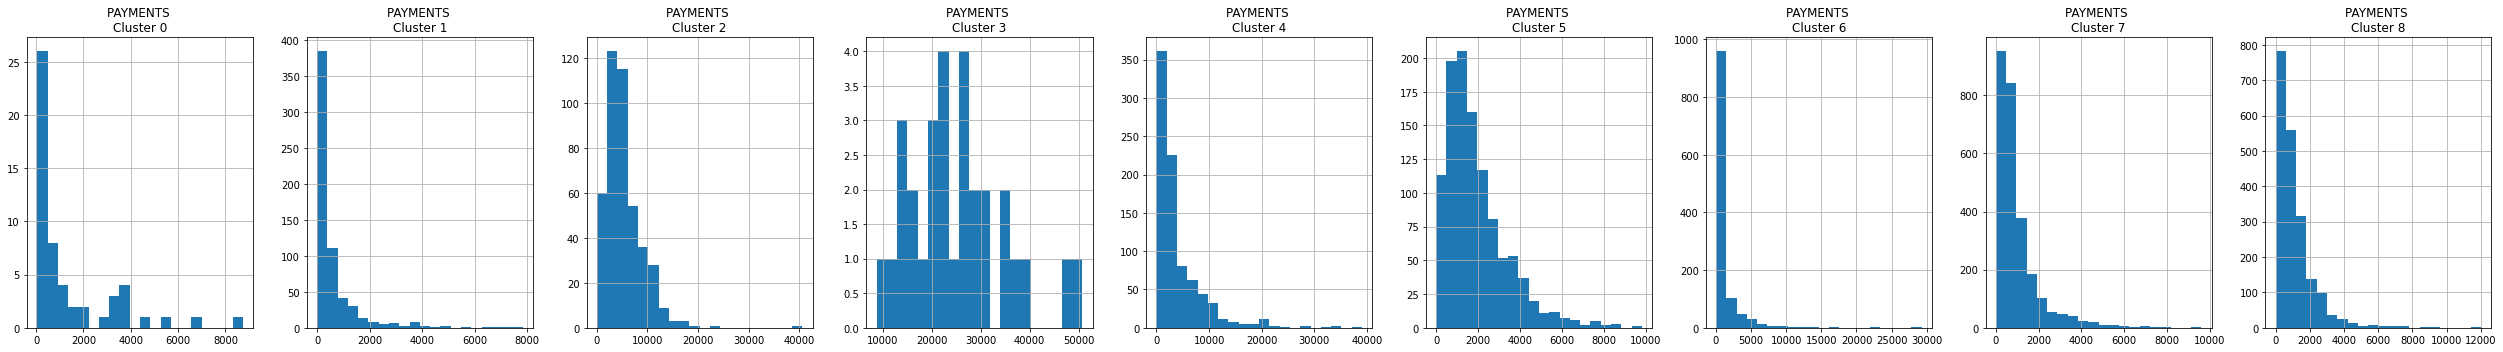

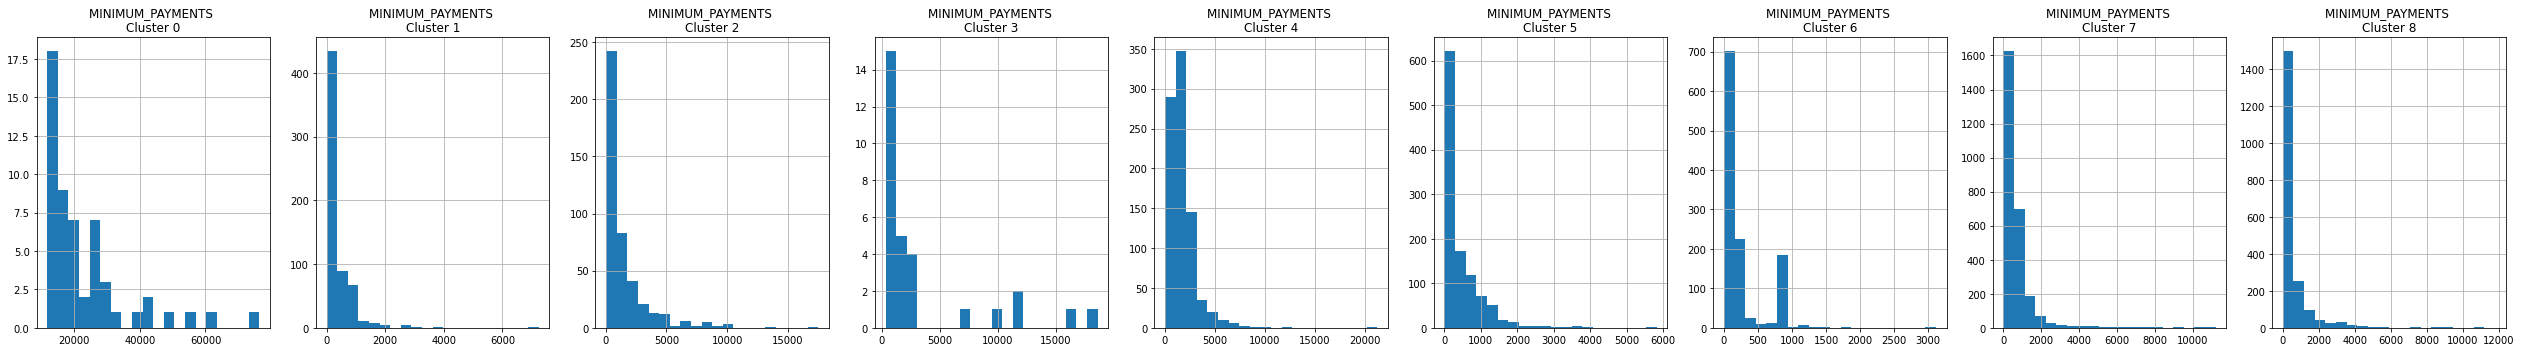

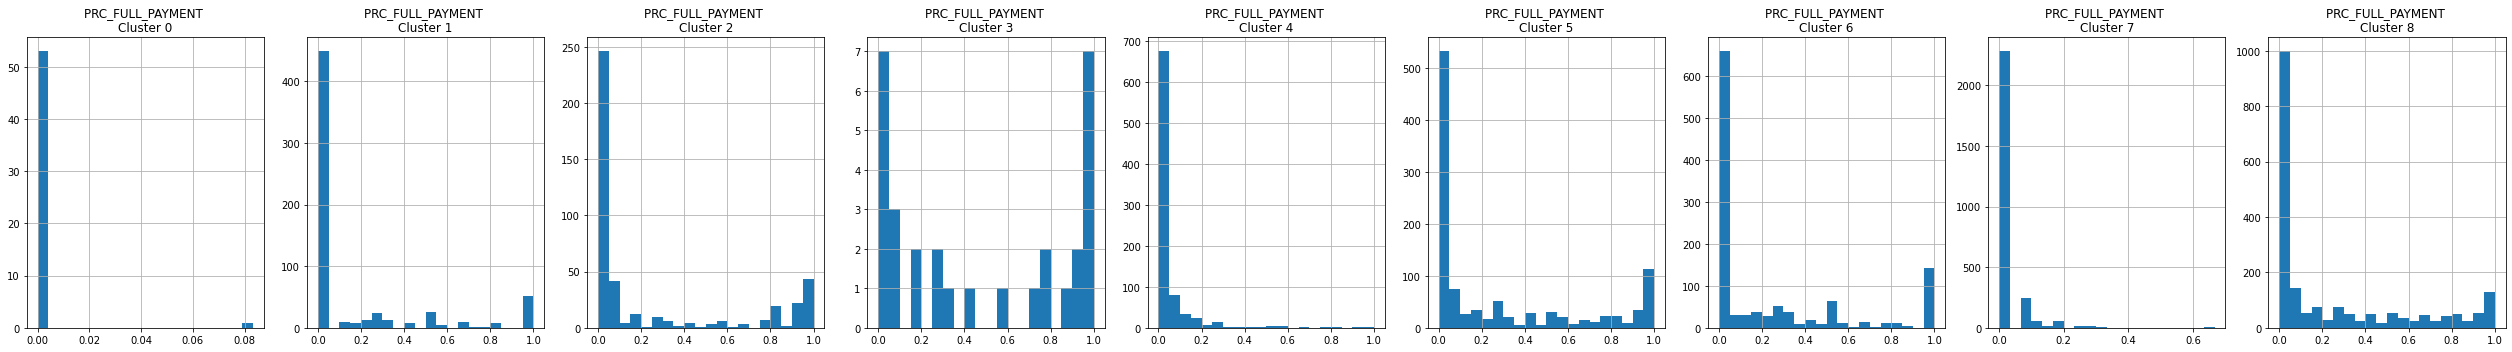

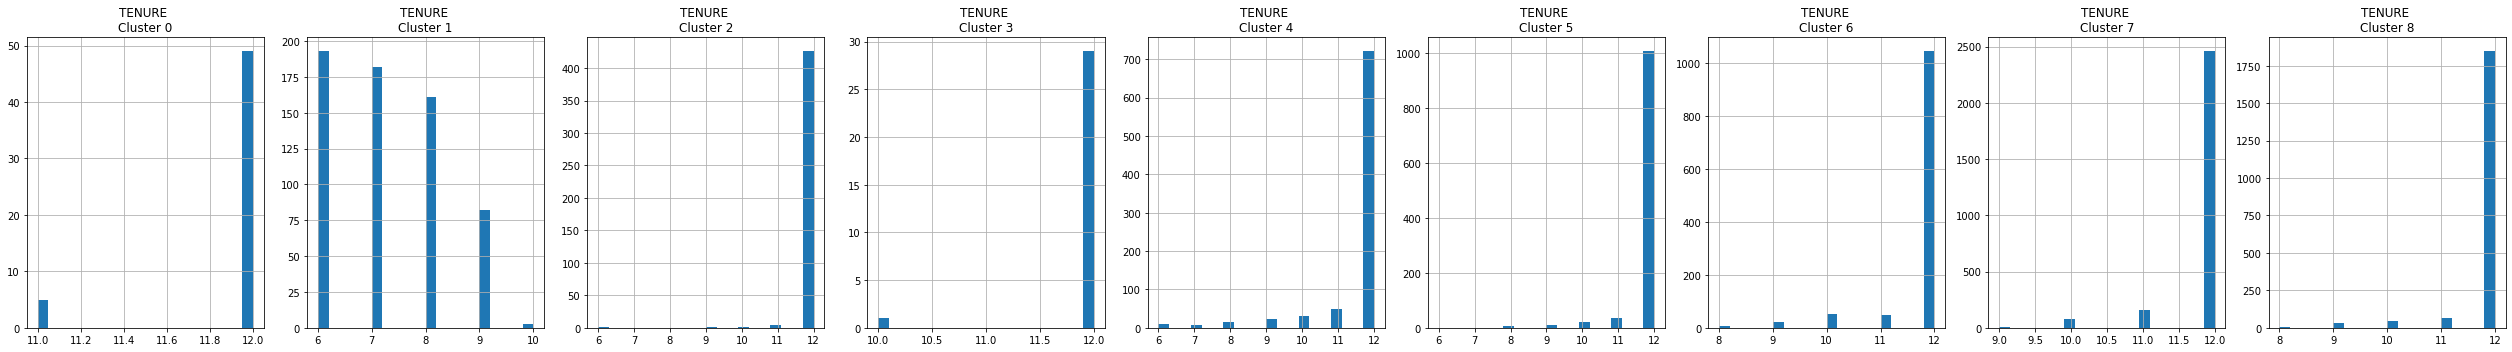

In [ ]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(9):
        plt.subplot(1, 9, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i, j))
    plt.tight_layout();
    plt.show()

### 6.4 Cluster features average


In [ ]:
creditcard_df_cluster.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,3874.347938,0.988215,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407
1,865.053452,0.795079,381.805926,230.358696,151.930322,1123.871809,0.408609,0.115637,0.275639,0.197228,3.260870,5.056361,2426.754347,596.489461,376.965548,0.158067,7.227053
2,3347.726316,0.987993,5833.519194,3552.815346,2282.086336,569.441255,0.957229,0.689310,0.846685,0.073904,1.801843,82.728111,9040.668203,5431.991336,1476.556232,0.247216,11.963134
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,5053.907985,0.969963,539.583776,336.994814,202.707459,5242.879239,0.300759,0.140826,0.201440,0.523164,16.562937,8.185315,8248.023946,4139.114293,1744.624257,0.039703,11.608392
5,1215.335922,0.968693,1926.747392,1546.754535,379.992857,266.226473,0.862906,0.759207,0.389408,0.051756,1.004608,27.289401,5807.905320,1931.214066,484.392555,0.271944,11.861751
6,104.735340,0.368592,335.339312,197.642005,137.949473,304.596210,0.266475,0.068715,0.190161,0.030997,0.683942,4.267630,3843.448976,1145.302906,266.389537,0.234927,11.784197
7,1589.975933,0.972791,228.782906,180.818926,48.147882,788.927000,0.142166,0.079595,0.063313,0.157561,3.083240,2.589000,3374.495231,1008.214360,725.630759,0.020108,11.882943
8,789.458991,0.956042,928.693265,189.831295,739.308610,221.182476,0.888614,0.088112,0.844102,0.040615,0.798000,19.351000,3561.335101,1122.829704,611.682108,0.248058,11.861000


## <a name="visualization"></a> 7\. Dimensionality Reduction and Visualization t-distributed Stochastic Neighbourhood Embedding (t-SNE) 

The PCA method did not present a good result, this may suggest a non-linear separation of the data. That said, let's try the t-SNE method, which is more appropriate for this type of situation.

In [ ]:
from sklearn.manifold import TSNE
tsne_comp = TSNE(n_components=2, learning_rate='auto',
                 init='random').fit_transform(creditcard_df_scaled)

In [ ]:
tsne_df = pd.DataFrame(data = tsne_comp, columns=['tsne1', 'tsne2'])
tsne_df.head()

,tsne1,tsne2
0,29.562363,4.683965
1,-5.688188,-57.324165
2,-35.017746,-2.364402
3,46.065056,11.464361
4,22.672281,-2.642574


In [ ]:
tsne_df = pd.concat([tsne_df, pd.DataFrame({'cluster': labels})], axis = 1)
tsne_df.head()

,tsne1,tsne2,cluster
0,29.562363,4.683965,7
1,-5.688188,-57.324165,4
2,-35.017746,-2.364402,5
3,46.065056,11.464361,7
4,22.672281,-2.642574,7


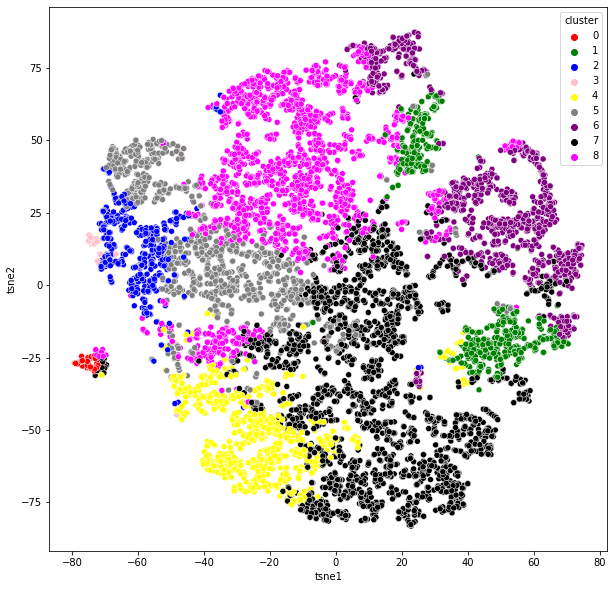

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'tsne1', y = 'tsne2', hue = 'cluster', 
                data = tsne_df, 
                palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray','purple', 'black','magenta'])

## <a name="insights"></a> 8\. Insights

* Cluster 1 (New customers): Younger customers (average 7.2 years old) who keep little money in their checking account (average of \$865);
* Cluster 3 (VIP/Prime): High card limit (average \$155570), frequent card purchases (average 0.91/1), and a high percentage of full credit card bill payment (average 48%). Increase your card's credit limit;
* Cluster 4: They use the credit card as a "loan" (the most profitable sector for the bank), have a lot of money in their checking account (average of \$5054), and withdraw a lot of money from the credit card (average of \$5242), buy little (average of 0.3/1) and heavily use the card limit for withdrawals (average of 0.52/1). They pay very little for the full credit card bill (average of 0.04/1);
* Cluster 6 (Less active customers): They have less money in their checking account (average of \$105), low balance frequency (0.37/1), low purchase frequence (0.27/1), and low cash advance frequence (0.03/1).

## <a name="save-results"></a> 9\. Save results

In [ ]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C17325,9024.812044,1.0,0.00,0.00,0.00,2750.442399,0.000000,0.000000,0.000000,0.083333,2,0,9000.0,302.484224,61031.61860,0.0,12,0
C12982,2964.124423,1.0,118.05,0.00,118.05,157.301178,0.083333,0.000000,0.083333,0.250000,4,2,3000.0,359.886515,17563.48542,0.0,12,0
C15901,4932.396527,1.0,0.00,0.00,0.00,245.596578,0.000000,0.000000,0.000000,0.166667,3,0,6000.0,5403.894447,14437.12209,0.0,12,0
C17614,2383.427985,1.0,95.08,95.08,0.00,2437.054164,0.083333,0.083333,0.000000,0.166667,4,3,2500.0,145.154675,16415.73279,0.0,12,0
C18243,5134.553859,1.0,2502.34,669.00,1833.34,0.000000,0.833333,0.083333,0.833333,0.000000,0,67,6000.0,528.134435,25312.16069,0.0,12,0


In [ ]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C17102,832.774626,1.000000,416.76,0.0,416.76,0.0,0.583333,0.0,0.583333,0.0,0,10,1000.0,169.674083,296.943958,0.00,12,8
C17107,51.469651,0.727273,1169.00,0.0,1169.00,0.0,1.000000,0.0,1.000000,0.0,0,24,1900.0,915.665640,111.493268,0.50,12,8
C13035,978.567283,1.000000,1401.54,0.0,1401.54,0.0,1.000000,0.0,1.000000,0.0,0,14,4500.0,1769.181653,302.284864,0.00,12,8
C17093,42.852743,1.000000,381.20,0.0,381.20,0.0,0.916667,0.0,0.916667,0.0,0,18,2500.0,330.100638,174.766771,0.80,12,8
C17319,33.146065,1.000000,218.76,0.0,218.76,0.0,1.000000,0.0,1.000000,0.0,0,12,5000.0,199.280071,155.771045,0.25,12,8


In [ ]:
credit_ordered.to_csv('cluster.csv')

## <a name="references"></a> References

[Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

[StatQuest: t-SNE, Clearly Explained](https://www.youtube.com/watch?v=NEaUSP4YerM)

[Elbow method](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)

[What is tSNE and when should I use it?](https://sonraianalytics.com/what-is-tsne/)